In [0]:
import pandas as pd
features = pd.read_csv("arr_big_data.csv")

In [0]:
features = features.drop(["Unnamed: 0"], axis = 1)
features

,presidents_day,easter,memorial_day,independence_day,labor_day,thanksgiving,winter_holiday,speed,total_dep_delay,total_arr_delay,temp,dew_point_temp,sea_level_pressure,station_pressure,visibilty,wind_speed,prcp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,...,dest_RIC,dest_RNO,dest_ROA,dest_ROC,dest_RSW,dest_SAN,dest_SAT,dest_SAV,dest_SBA,dest_SCK,dest_SDF,dest_SEA,dest_SFB,dest_SFO,dest_SGF,dest_SHV,dest_SIT,dest_SJC,dest_SJU,dest_SLC,dest_SMF,dest_SNA,dest_SRQ,dest_STL,dest_STT,dest_STX,dest_SWF,dest_SYR,dest_TLH,dest_TPA,dest_TRI,dest_TTN,dest_TUL,dest_TUS,dest_TVC,dest_TYS,dest_USA,dest_UST,dest_VPS,dest_XNA
0,0,0,0,0,0,0,0,5.505747,51.0,52.0,39.8,27.2,1033.9,1010.5,10.0,8.6,0.62,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,6.331606,4.0,1.0,62.6,56.1,1022.2,1018.3,6.9,3.9,0.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,8.851301,19.0,-23.0,36.9,14.8,1017.0,938.9,10.0,6.2,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,5.711538,88.0,81.0,50.0,22.1,1019.8,982.4,10.0,5.7,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,4.931507,48.0,19.0,26.3,8.6,1024.6,1023.6,10.0,6.1,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177521,0,0,0,0,0,0,0,5.823529,31.0,4.0,42.2,15.9,1027.5,989.3,10.0,5.3,0.00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
177522,0,0,0,0,0,0,0,5.743802,24.0,11.0,29.4,23.9,1013.7,977.0,5.2,11.0,0.66,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
177523,0,0,0,0,0,0,0,7.576923,8.0,-21.0,16.3,3.7,1026.0,0.0,10.0,10.7,0.00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
177524,0,0,0,0,0,0,0,7.267717,27.0,-5.0,50.2,36.8,1016.4,15.9,9.9,12.7,0.08,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(features['total_arr_delay'])
# Remove the labels from the features
# axis 1 refers to the columns
features = features.drop(['total_arr_delay'], axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 42)

In [0]:
# Fitting Random Forest Regression to the Training set
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
regressor.fit(X_train, y_train)
# Predicting the Test set results
y_pred = regressor.predict(X_test)
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 8.559417727520232
Mean Squared Error: 190.03688708711286
Root Mean Squared Error: 13.78538672243593


In [0]:
# Get numerical feature importances
importances = list(regressor.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: total_dep_delay      Importance: 0.72
Variable: speed                Importance: 0.05
Variable: temp                 Importance: 0.02
Variable: dew_point_temp       Importance: 0.02
Variable: station_pressure     Importance: 0.02
Variable: wind_speed           Importance: 0.02
Variable: sea_level_pressure   Importance: 0.01
Variable: visibilty            Importance: 0.01
Variable: prcp                 Importance: 0.01
Variable: presidents_day       Importance: 0.0
Variable: easter               Importance: 0.0
Variable: memorial_day         Importance: 0.0
Variable: independence_day     Importance: 0.0
Variable: labor_day            Importance: 0.0
Variable: thanksgiving         Importance: 0.0
Variable: winter_holiday       Importance: 0.0
Variable: fog                  Importance: 0.0
Variable: rain_drizzle         Importance: 0.0
Variable: snow_ice_pellets     Importance: 0.0
Variable: hail                 Importance: 0.0
Variable: thunder              Importance: 0.0
Vari

In [0]:
rf_dep = pd.DataFrame(feature_importances).head(10)
rf_dep.columns = ["Variables", "Importance"]
rf_dep

,Variables,Importance
0,total_dep_delay,0.72
1,speed,0.05
2,temp,0.02
3,dew_point_temp,0.02
4,station_pressure,0.02
5,wind_speed,0.02
6,sea_level_pressure,0.01
7,visibilty,0.01
8,prcp,0.01
9,presidents_day,0.00


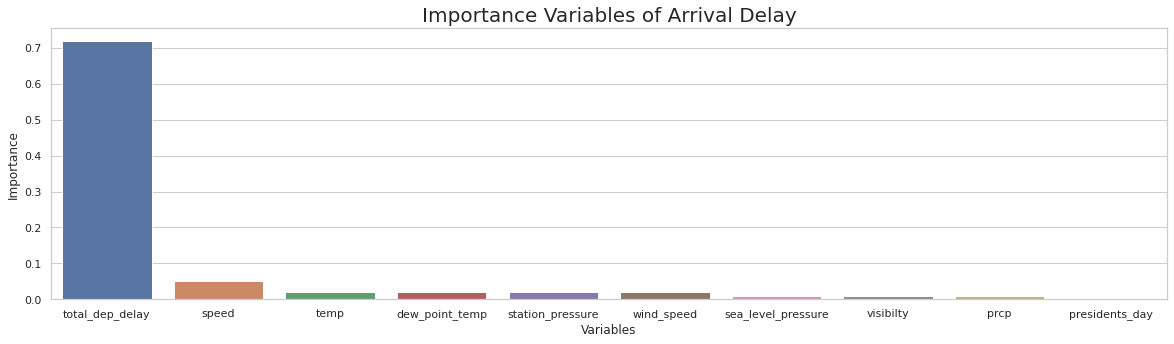

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
sns.set(style="whitegrid")
ax = sns.barplot(x="Variables", y="Importance", data=rf_dep).set_title("Importance Variables of Arrival Delay", fontsize = 20)